<a href="https://colab.research.google.com/github/zahidnubcse/Python/blob/main/41220300634_ZahidHasan_9B_Lab2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Step 1: Load and Explore the Dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target  #Diabetes Progression Score (disease severity)


# Display first 5 rows
print("First 5 Rows of Dataset:\n", df.head())

First 5 Rows of Dataset:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


**✅ Task 1: Data Exploration**

Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Summary Statistics:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.42

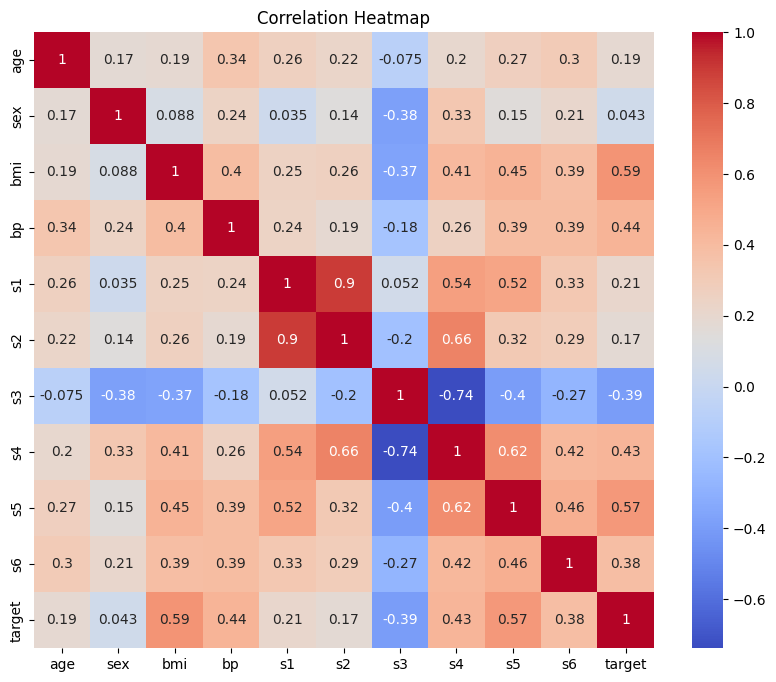

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**✅ Task 2: Data Preprocessing**

In [5]:
# Split the data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**✅ Task 3: Implement Simple Linear Regression**

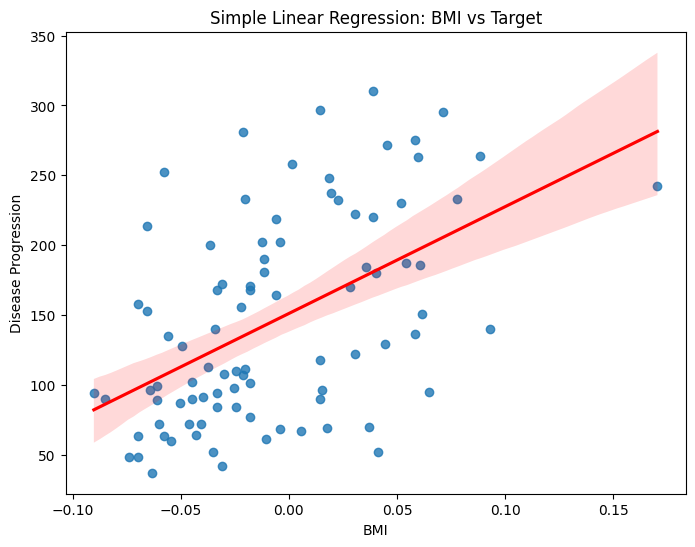

In [6]:
# Use only 'bmi' feature
X_bmi = df[["bmi"]]
y = df["target"]

X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_bmi_train, y_bmi_train)

# Predict
y_bmi_pred = simple_model.predict(X_bmi_test)

# Plot regression
plt.figure(figsize=(8, 6))
sns.regplot(x=X_bmi_test["bmi"], y=y_bmi_test, line_kws={"color": "red"})
plt.title("Simple Linear Regression: BMI vs Target")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()


**✅ Task 4: Implement Multiple Linear Regression**

In [7]:
# Train model using all features
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_model.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Absolute Error: 42.79409467959994
Mean Squared Error: 2900.1936284934823
R-squared Score: 0.45260276297191926


**✅ Task 5: Feature Importance Analysis**

/tmp/ipython-input-8-1050261311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette="viridis")


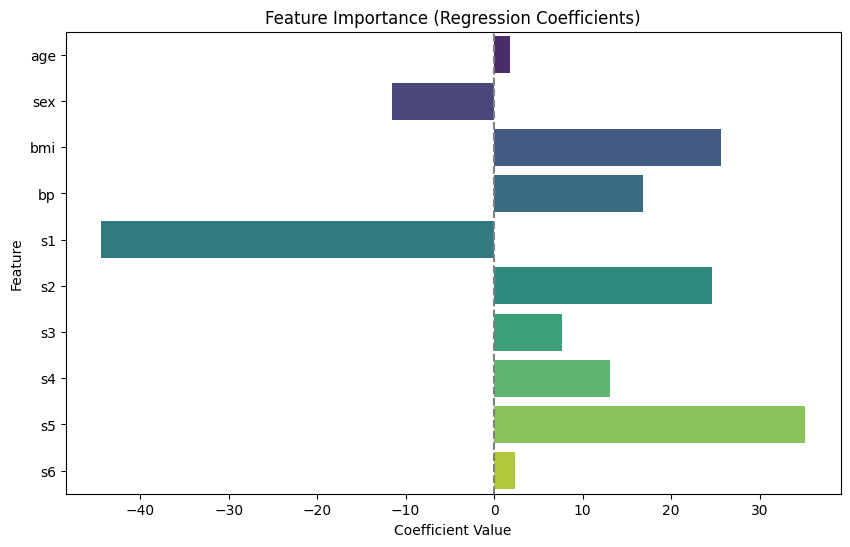

In [8]:
# Coefficients and feature importance
coefficients = multi_model.coef_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Feature Importance (Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.show()
